# Victoria Offenders by Gender

This portion of the project analyse Melbourne crime incidences by gender. We would look into;
1) Which gender is most likely to commit a offense 

2) Which Principal Offence is more likely to be committed by each gender

3) Any significant changes in the last 5 years

** Miscellaneous Offences are inclusive of Covid-related crime

Resources: https://www.abs.gov.au/statistics/people/crime-and-justice/recorded-crime-offenders/2020-21#victoria

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Reading in Data from file
filename = "offenders.csv"
file = f"resources\{filename}"
vic_offenders = pd.read_csv(file)
vic_offenders = vic_offenders.rename(columns={'Unnamed: 0': 'Year_Period'})
vic_offenders.tail()

,Year_Period,Gender,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
34,2016–17,Other,117,17725,1779,1053,1615,522,2154,8386,2020,2400,8809,4244,3417,8350,4583,8689,75863
35,2017–18,Other,157,17406,1683,961,1574,615,2108,8012,2008,2413,8577,5618,3275,10516,4752,7601,77276
36,2018–19,Other,138,17423,1737,950,1717,672,1974,8626,1783,2540,9385,5758,3030,9053,5043,6165,75994
37,2019–20,Other,146,17171,1695,913,1766,805,1879,8331,1277,2552,9898,5696,2861,6244,5328,7630,74192
38,2020–21,Other,162,17351,1612,894,1929,490,1600,6068,623,2206,8595,5320,2862,4199,4949,19692,78552


In [47]:
# Update all number fields to numeric
vic_offenders = vic_offenders.astype({'Homicide and related offences': 'int64', 
                                      'Acts intended to cause injury': 'int64', 
                                      'Sexual assault and related offences': 'int64', 
                                      'Dangerous_negligent acts': 'int64', 
                                      'Abduction_harassment': 'int64', 
                                      'Fare evasion': 'int64', 
                                      'Fraud_deception': 'int64', 
                                      'Illicit drug offences': 'int64',                                       
                                      'Weapons_explosives': 'int64', 
                                      'Property damage and environmental pollution': 'int64', 
                                      'Public order offences': 'int64', 
                                      'Offences against justice': 'int64',
                                      'Miscellaneous offences': 'int64'
                                     })
# Statistical overview of dataset
vic_offenders.describe()

,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,91.871795,10355.589744,1015.666667,572.384615,859.025641,363.717949,1544.256410,7716.692308,661.717949,1531.512821,5545.717949,2713.000000,2306.307692,6827.615385,2467.948718,7417.179487,51990.205128
std,54.907185,5669.156893,698.475910,331.637851,570.106984,220.236111,926.614884,4138.377111,880.883795,646.293516,2955.804948,1795.651531,1279.174552,4600.213259,1540.506068,4874.250765,26669.166325
min,6.000000,2151.000000,28.000000,91.000000,91.000000,54.000000,291.000000,2453.000000,0.000000,600.000000,1091.000000,239.000000,535.000000,657.000000,396.000000,814.000000,14401.000000
25%,26.500000,3404.500000,81.000000,150.000000,287.500000,96.500000,380.500000,4636.500000,0.000000,848.000000,2031.500000,839.000000,629.500000,1823.000000,1006.000000,2077.500000,16740.000000
50%,115.000000,12406.000000,1330.000000,732.000000,755.000000,442.000000,1754.000000,6312.000000,261.000000,1518.000000,6639.000000,2616.000000,2835.000000,7480.000000,2332.000000,7618.000000,61318.000000
75%,134.500000,14195.000000,1584.500000,817.000000,1372.000000,521.000000,2200.000000,9397.000000,1379.500000,2197.000000,7652.000000,4265.500000,3287.000000,10501.500000,3794.000000,10938.000000,75928.500000
max,169.000000,17725.000000,1779.000000,1053.000000,1929.000000,805.000000,3147.000000,17457.000000,2701.000000,2552.000000,9898.000000,5758.000000,3957.000000,15173.000000,5328.000000,19692.000000,87688.000000


# Principal Offences by Male

In [48]:
# data breakdown
# Retrieving last 5 years of Male data
vic_male_offenders = vic_offenders.loc[(vic_offenders['Gender'] == "Male")].sort_values('Year_Period', ascending=True).tail()
vic_male_offenders.describe()

,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,122.200000,13989.000000,1617.800000,803.800000,1423.000000,523.800000,1592.600000,4499.400000,1288.400000,1586.000000,6988.20000,4485.000000,2508.000000,6516.000000,3913.000000,7941.800000,59798.000000
std,16.634302,230.552597,59.381815,54.426097,112.760809,112.963268,188.049993,506.211715,519.378764,81.856582,491.85384,532.779504,217.915121,2106.517624,206.066737,3768.494288,1275.941025
min,94.000000,13737.000000,1532.000000,760.000000,1311.000000,379.000000,1308.000000,3617.000000,516.000000,1485.000000,6464.00000,3553.000000,2279.000000,3544.000000,3697.000000,5356.000000,57912.000000
25%,123.000000,13898.000000,1596.000000,767.000000,1350.000000,468.000000,1532.000000,4568.000000,1010.000000,1550.000000,6649.00000,4533.000000,2331.000000,5360.000000,3767.000000,6111.000000,59567.000000
50%,126.000000,13920.000000,1617.000000,796.000000,1394.000000,525.000000,1602.000000,4655.000000,1482.000000,1554.000000,6842.00000,4731.000000,2472.000000,7044.000000,3914.000000,6562.000000,59642.000000
75%,131.000000,14035.000000,1658.000000,800.000000,1462.000000,564.000000,1748.000000,4808.000000,1713.000000,1670.000000,7340.00000,4789.000000,2669.000000,7675.000000,3958.000000,7094.000000,60551.000000
max,137.000000,14355.000000,1686.000000,896.000000,1598.000000,683.000000,1773.000000,4849.000000,1721.000000,1671.000000,7646.00000,4819.000000,2789.000000,8957.000000,4229.000000,14586.000000,61318.000000


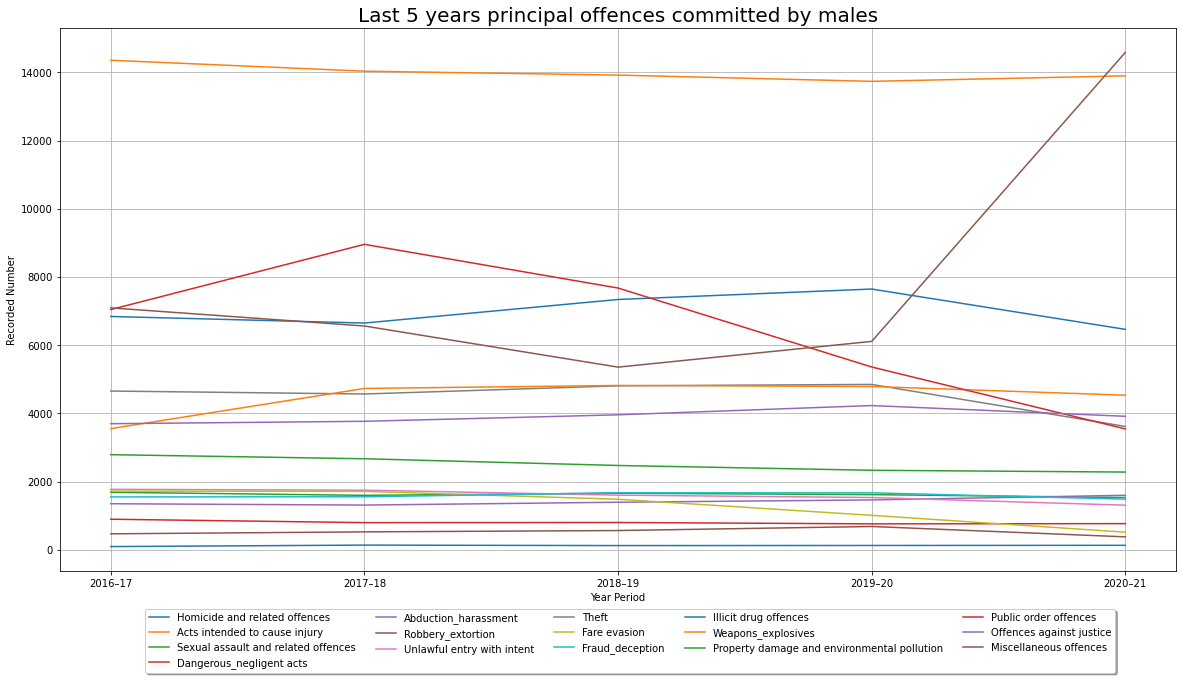

In [49]:
# Line graph to show trend in the last 5 years
plt.figure(figsize=(20, 10))
for col in vic_male_offenders.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total'):
        plt.plot(vic_male_offenders['Year_Period'], vic_male_offenders[col], label= col)

plt.title(f"Last 5 years principal offences committed by males", fontsize=20)
plt.xlabel("Year Period")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.95, -0.06), fancybox=True, shadow=True, ncol=5)
plt.show()


In [50]:
least_offence_male = []
# Top 10 crimes by male
vic_male_offenders_tally = vic_male_offenders.drop(['Year_Period', 'Gender', 'Total'], axis=1).sum().sort_values(ascending=False).reset_index()
vic_male_offenders_tally = vic_male_offenders_tally.rename(columns={'index': 'Principal Offences', 0: 'Total Count'})
top10Crimes_male = vic_male_offenders_tally.head(10)

# Number of offences excluded from top 10
# least_count_male = len(vic_male_offenders_tally) - len(top10Crimes_male)

# Load least commited offences into a list
for i in np.arange(10, len(vic_male_offenders_tally)):
    least_offence_male.append(vic_male_offenders_tally['Principal Offences'][i])

    # Show top 10 Principal Offences
top10Crimes_male

,Principal Offences,Total Count
0,Acts intended to cause injury,69945
1,Miscellaneous offences,39709
2,Illicit drug offences,34941
3,Public order offences,32580
4,Theft,22497
5,Weapons_explosives,22425
6,Offences against justice,19565
7,Property damage and environmental pollution,12540
8,Sexual assault and related offences,8089
9,Unlawful entry with intent,7963


## Top 10 Principal Offences by Male

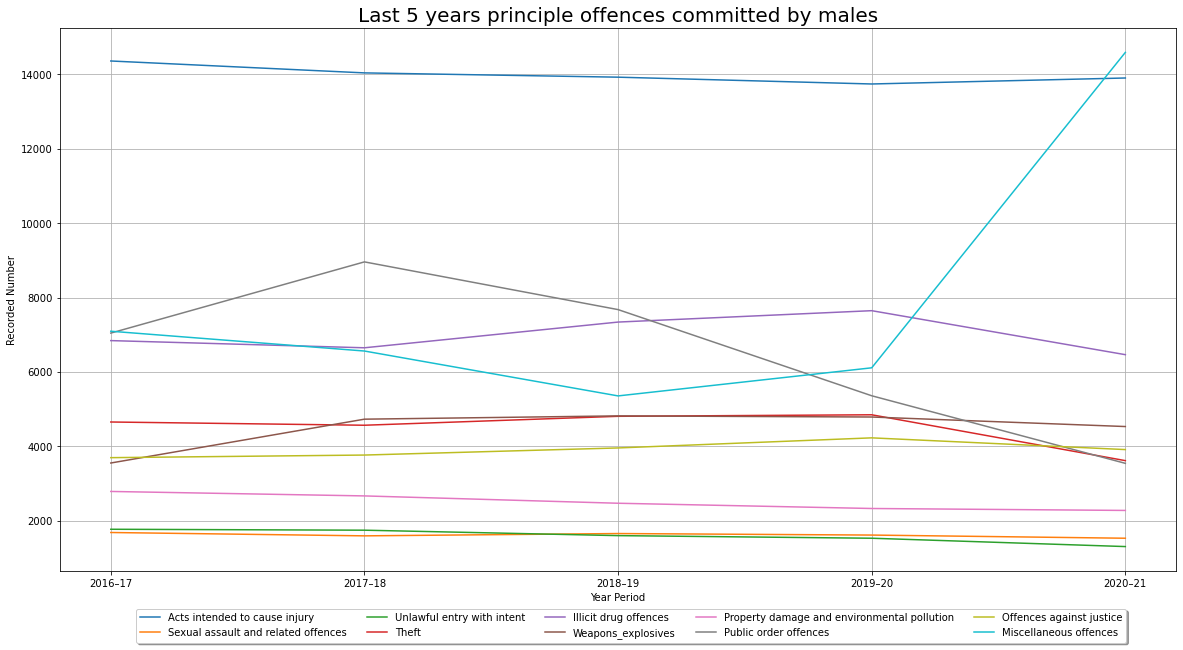

In [51]:
# Line graph to show trend in the last 5 years
# Removing offences not in the top 10
for exCol in least_offence_male:
    vic_male_offenders = vic_male_offenders.drop(exCol, axis=1, errors='ignore')

# Plotting graph
plt.figure(figsize=(20, 10))
for col in vic_male_offenders.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total' or col == 'exCol'):
        plt.plot(vic_male_offenders['Year_Period'], vic_male_offenders[col], label= col)
plt.title(f"Last 5 years principle offences committed by males", fontsize=20)
plt.xlabel("Year Period")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.96, -0.06), fancybox=True, shadow=True, ncol=5)
plt.show()


# Principal Offences by Female

In [52]:
# data breakdown
# Retrieving last 5 years of female data
vic_female_offenders = vic_offenders.loc[(vic_offenders['Gender'] == "Female")].sort_values('Year_Period', ascending=True).tail()
vic_female_offenders.describe()

,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,22.600000,3419.800000,80.600000,148.400000,296.000000,96.40000,348.600000,3378.600000,254.000000,833.800000,2060.400000,843.000000,580.000000,1152.200000,1011.600000,1957.000000,16483.000000
std,6.107373,61.120373,4.560702,15.093045,32.457665,22.54551,34.602023,541.070513,81.786307,61.296003,137.360111,103.164917,35.057096,370.100932,93.548383,1779.483211,870.866235
min,17.000000,3343.000000,73.000000,123.000000,259.000000,62.00000,291.000000,2453.000000,111.000000,727.000000,1931.000000,687.000000,535.000000,657.000000,866.000000,814.000000,15849.000000
25%,18.000000,3378.000000,81.000000,149.000000,264.000000,87.00000,344.000000,3437.000000,261.000000,840.000000,1939.000000,792.000000,559.000000,889.000000,980.000000,1039.000000,15943.000000
50%,20.000000,3431.000000,81.000000,151.000000,307.000000,106.00000,359.000000,3476.000000,294.000000,856.000000,2045.000000,886.000000,577.000000,1278.000000,1032.000000,1305.000000,16273.000000
75%,27.000000,3447.000000,83.000000,157.000000,322.000000,107.00000,374.000000,3713.000000,297.000000,870.000000,2129.000000,912.000000,609.000000,1375.000000,1083.000000,1523.000000,16357.000000
max,31.000000,3500.000000,85.000000,162.000000,328.000000,120.00000,375.000000,3814.000000,307.000000,876.000000,2258.000000,938.000000,620.000000,1562.000000,1097.000000,5104.000000,17993.000000


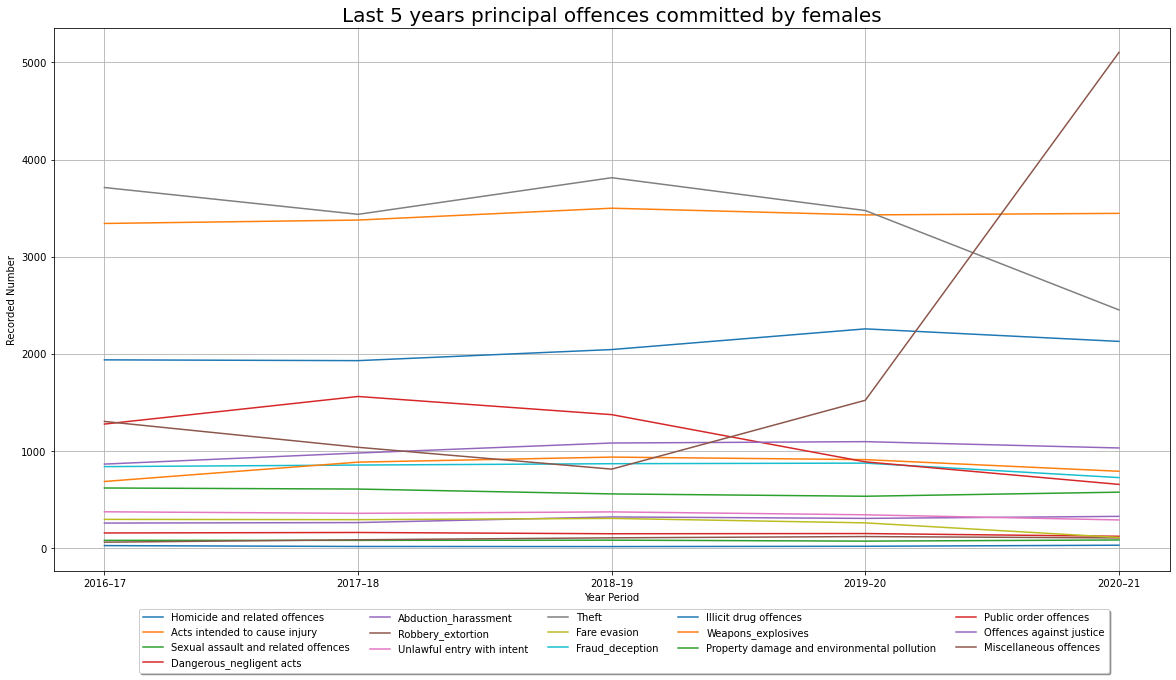

In [53]:
# Line graph to show trend in the last 5 years
plt.figure(figsize=(20, 10))
for col in vic_female_offenders.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total'):
        plt.plot(vic_female_offenders['Year_Period'], vic_female_offenders[col], label= col)

plt.title(f"Last 5 years principal offences committed by females", fontsize=20)
plt.xlabel("Year Period")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.95, -0.06), fancybox=True, shadow=True, ncol=5)
plt.show()


In [54]:
least_offence_female = []
# Top 10 crimes by female
vic_female_offenders_tally = vic_female_offenders.drop(['Year_Period', 'Gender', 'Total'], axis=1).sum().sort_values(ascending=False).reset_index()
vic_female_offenders_tally = vic_female_offenders_tally.rename(columns={'index': 'Principal Offences', 0: 'Total Count'})
top10Crimes_female = vic_female_offenders_tally.head(10)

# Load least commited offences into a list
for i in np.arange(10, len(vic_female_offenders_tally)):
    least_offence_female.append(vic_female_offenders_tally['Principal Offences'][i])

    # Show top 10 Principal Offences
top10Crimes_female

,Principal Offences,Total Count
0,Acts intended to cause injury,17099
1,Theft,16893
2,Illicit drug offences,10302
3,Miscellaneous offences,9785
4,Public order offences,5761
5,Offences against justice,5058
6,Weapons_explosives,4215
7,Fraud_deception,4169
8,Property damage and environmental pollution,2900
9,Unlawful entry with intent,1743


## Top 10 Principal Offences by female

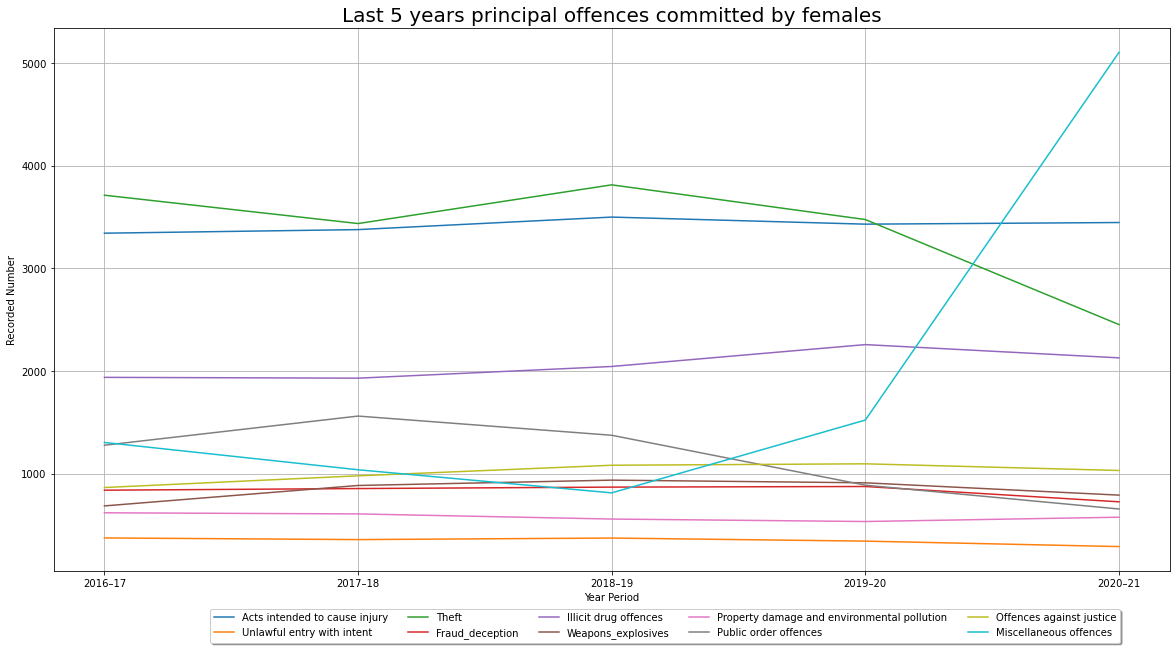

In [58]:
# Line graph to show trend in the last 5 years
# Removing offences not in the top 10
for exCol in least_offence_female:
    vic_female_offenders = vic_female_offenders.drop(exCol, axis=1, errors='ignore')

# Plotting graph
plt.figure(figsize=(20, 10))
for col in vic_female_offenders.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total' or col == 'exCol'):
        plt.plot(vic_female_offenders['Year_Period'], vic_female_offenders[col], label= col)
plt.title(f"Last 5 years principal offences committed by females", fontsize=20)
plt.xlabel("Year Period")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.96, -0.06), fancybox=True, shadow=True, ncol=5)
plt.show()

# 'Other'

In [59]:
vic_other_offenders = vic_offenders.loc[(vic_offenders['Gender'] == "Other")].sort_values('Year_Period', ascending=True).tail()

least_offence_other = []
# Top 10 crimes by other
vic_other_offenders_tally = vic_other_offenders.drop(['Year_Period', 'Gender', 'Total'], axis=1).sum().sort_values(ascending=False).reset_index()
vic_other_offenders_tally = vic_other_offenders_tally.rename(columns={'index': 'Principal Offences', 0: 'Total Count'})
top10Crimes_other = vic_other_offenders_tally.head(10)

# Load least commited offences into a list
for i in np.arange(10, len(vic_other_offenders_tally)):
    least_offence_other.append(vic_other_offenders_tally['Principal Offences'][i])

    # Show top 10 Principal Offences
top10Crimes_other

,Principal Offences,Total Count
0,Acts intended to cause injury,87076
1,Miscellaneous offences,49777
2,Illicit drug offences,45264
3,Theft,39423
4,Public order offences,38362
5,Weapons_explosives,26636
6,Offences against justice,24655
7,Property damage and environmental pollution,15445
8,Fraud_deception,12111
9,Unlawful entry with intent,9715


In [60]:
vic_male_current = vic_male_offenders.tail(1)
vic_female_current = vic_female_offenders.tail(1)
vic_other_current = vic_other_offenders.tail(1)

# 2020 - 2021 Overview

In [65]:
vic_male_current_p = pd.DataFrame({'offences': vic_male_current.drop(['Year_Period', 'Gender', 'Total'], axis =1, errors = 'ignore').columns, 
                                'Gender': 'Male'})
vic_male_current_p['count'] = 0
for i in np.arange(0, len(vic_male_current_p)):
    offence_name = vic_male_current_p['offences'][i]
    for index, row in vic_male_current.iterrows():
        vic_male_current_p.loc[i, 'count'] = row[offence_name]
        
vic_female_current_p = pd.DataFrame({'offences': vic_female_current.drop(['Year_Period', 'Gender', 'Total'], axis =1, errors = 'ignore').columns, 
                                'Gender': 'Female'})
vic_female_current_p['count'] = 0
for i in np.arange(0, len(vic_female_current_p)):
    offence_name = vic_female_current_p['offences'][i]
    for index, row in vic_female_current.iterrows():
        vic_female_current_p.loc[i, 'count'] = row[offence_name]
        
vic_other_current_p = pd.DataFrame({'offences': vic_other_current.drop(['Year_Period', 'Gender', 'Total'], axis =1, errors = 'ignore').columns, 
                                'Gender': 'other'})
vic_other_current_p['count'] = 0
for i in np.arange(0, len(vic_other_current_p)):
    offence_name = vic_other_current_p['offences'][i]
    for index, row in vic_other_current.iterrows():
        vic_other_current_p.loc[i, 'count'] = row[offence_name]

complete_offenders = pd.concat([vic_male_current_p, vic_female_current_p])
complete_offenders = pd.concat([complete_offenders, vic_other_current_p])


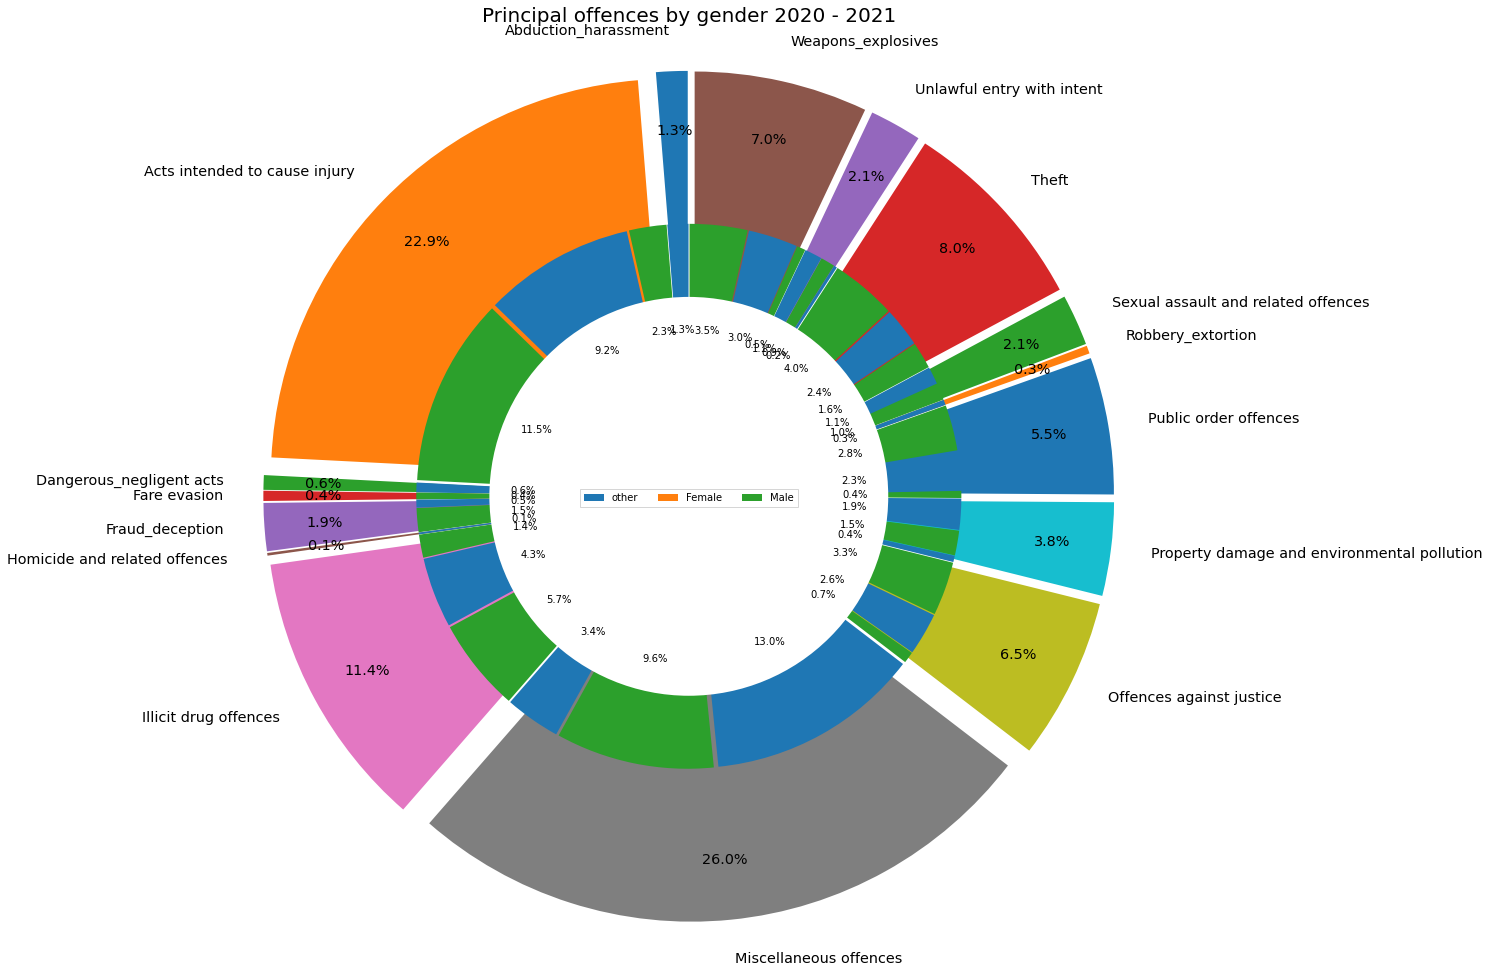

In [68]:
# Data to plot
group_data_outer = pd.DataFrame(complete_offenders.groupby(['offences'])['count'].sum()).reset_index()
group_data_inner = pd.DataFrame(complete_offenders.groupby(['offences', 'Gender'])['count'].sum())

#Setting Labels
labels_outer = group_data_outer['offences']
data_outer = group_data_outer['count']

labels_inner = group_data_inner.reset_index()['Gender']
data_inner = group_data_inner['count']
labels_inner_legend= list(dict.fromkeys(labels_inner))

# Setting colours
colours_inner = []
for gender in labels_inner:
    if gender == "Female":
        colours_inner.append('tab:blue')
        if gender == "male":
            colours_inner.append('tab:orange')
        else:
            colours_inner.append('tab:green')

# colours_outer = [plt.cm.coolwarm(x) for x in np.arange(0, len(group_data_outer))]

# Set explode value
explode_outer = [0.2 for x in np.arange(0, len(group_data_outer))]
explode_inner = [0.05 for x in np.arange(0, len(group_data_inner))]

#Plot
plt.figure(figsize=(20,15))
plt.pie(data_outer,  labels=labels_outer, startangle=90,frame=True, explode=explode_outer, radius=3, 
        pctdistance=0.85, autopct='%.1f%%',  textprops={'size': 'x-large'})
plt.pie(data_inner, colors= colours_inner, startangle=90, explode=explode_inner, radius=2, autopct='%.1f%%')

#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.legend(labels_inner_legend, loc='center', fancybox=False, shadow=False, ncol=4)
plt.title('Principal offences by gender 2020 - 2021', fontsize=20)
plt.subplots_adjust(top=0.88)
plt.savefig("Images\Principal offences by gender 2020 - 2021.PNG", facecolor="white")
plt.show()

In [32]:
complete_5_years = vic_offenders.sort_values(['Year_Period', 'Gender'], ascending=True).tail(15).reset_index(drop=True)
complete_5_years

,Year_Period,Gender,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
0,2016–17,Female,27,3343,81,157,259,62,375,3713,297,840,1939,687,620,1278,866,1305,15849
1,2016–17,Male,94,14355,1686,896,1350,468,1773,4655,1721,1550,6842,3553,2789,7044,3697,7094,59567
2,2016–17,Other,117,17725,1779,1053,1615,522,2154,8386,2020,2400,8809,4244,3417,8350,4583,8689,75863
3,2017–18,Female,18,3378,81,162,264,87,359,3437,294,856,1931,886,609,1562,980,1039,15943
4,2017–18,Male,137,14035,1596,796,1311,525,1748,4568,1713,1554,6649,4731,2669,8957,3767,6562,61318
5,2017–18,Other,157,17406,1683,961,1574,615,2108,8012,2008,2413,8577,5618,3275,10516,4752,7601,77276
6,2018–19,Female,17,3500,83,149,322,107,374,3814,307,870,2045,938,559,1375,1083,814,16357
7,2018–19,Male,123,13920,1658,800,1394,564,1602,4808,1482,1671,7340,4819,2472,7675,3958,5356,59642
8,2018–19,Other,138,17423,1737,950,1717,672,1974,8626,1783,2540,9385,5758,3030,9053,5043,6165,75994
9,2019–20,Female,20,3431,73,151,307,120,344,3476,261,876,2258,912,535,889,1097,1523,16273


In [33]:
offences_list =[]
offences_count = []
offences_female = []
offences_male = []
# offences_list['count'] = 0
for col in complete_5_years.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total'):
        overallperc = complete_5_years[col].sum() / complete_5_years['Total'].sum()
        if overallperc < 0.03:
            complete_5_years =complete_5_years.drop(col, axis=1, errors='ignore')
        else:
            offences_list.append(col)
            for index, row in complete_5_years.iterrows():
                if row['Gender'] == 'Female':
                    offences_female.append(row[col])
                else:
                    offences_male.append(row[col])
complete_5_years

,Year_Period,Gender,Acts intended to cause injury,Theft,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
0,2016–17,Female,3343,3713,840,1939,687,620,1278,866,1305,15849
1,2016–17,Male,14355,4655,1550,6842,3553,2789,7044,3697,7094,59567
2,2016–17,Other,17725,8386,2400,8809,4244,3417,8350,4583,8689,75863
3,2017–18,Female,3378,3437,856,1931,886,609,1562,980,1039,15943
4,2017–18,Male,14035,4568,1554,6649,4731,2669,8957,3767,6562,61318
5,2017–18,Other,17406,8012,2413,8577,5618,3275,10516,4752,7601,77276
6,2018–19,Female,3500,3814,870,2045,938,559,1375,1083,814,16357
7,2018–19,Male,13920,4808,1671,7340,4819,2472,7675,3958,5356,59642
8,2018–19,Other,17423,8626,2540,9385,5758,3030,9053,5043,6165,75994
9,2019–20,Female,3431,3476,876,2258,912,535,889,1097,1523,16273
